In [2]:
%reload_ext nb_black

import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.multitest import multipletests
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

%matplotlib inline
import os

print(os.getcwd())

print(os.listdir(os.getcwd()))

C:\Users\jlim7\OneDrive\Documents\GitHub\Capstone1_Rename_later
['.git', '.gitignore', '.ipynb_checkpoints', '769175_1325857_bundle_archive.zip', 'Data Analysis.ipynb', 'Initial EDA.ipynb', 'modern-renewable-energy-consumption.csv', 'README.md', 'Research Proposal.ipynb']


<IPython.core.display.Javascript object>

In [3]:
# Data obtained from https://www.kaggle.com/khadeejahalghadeer/renewable-energy-generation-world-1965-to-2018
energy = pd.read_csv("modern-renewable-energy-consumption.csv")
energy.head()

,Entity,Code,Year,Hydropower (terawatt-hours),Solar (terawatt-hours),Wind (terawatt-hours),Other renewables (terawatt-hours)
0,Africa,NaN,1965,14.278806,0.0,0.0,0.0
1,Africa,NaN,1966,15.649049,0.0,0.0,0.0
2,Africa,NaN,1967,16.158333,0.0,0.0,0.0
3,Africa,NaN,1968,18.622983,0.0,0.0,0.0
4,Africa,NaN,1969,21.582897,0.0,0.0,0.0


<IPython.core.display.Javascript object>

In [4]:
# 1060 null in df
energy.isna().sum().sum()

1060

<IPython.core.display.Javascript object>

In [5]:
energy["Entity"].unique()

array(['Africa', 'Algeria', 'Argentina', 'Asia Pacific', 'Australia',
       'Austria', 'Azerbaijan', 'Bangladesh', 'Belarus', 'Belgium',
       'Brazil', 'Bulgaria', 'CIS', 'Canada', 'Central America', 'Chile',
       'China', 'Colombia', 'Croatia', 'Cyprus', 'Czech Republic',
       'Denmark', 'Eastern Africa', 'Ecuador', 'Egypt', 'Estonia',
       'Europe', 'Europe (other)', 'Finland', 'France', 'Germany',
       'Greece', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Kazakhstan', 'Kuwait', 'Latvia', 'Lithuania', 'Luxembourg',
       'Macedonia', 'Malaysia', 'Mexico', 'Middle Africa', 'Middle East',
       'Morocco', 'Netherlands', 'New Zealand', 'North America', 'Norway',
       'Oman', 'Other Asia & Pacific', 'Other CIS', 'Other Caribbean',
       'Other Middle East', 'Other Northern Africa',
       'Other South America', 'Other Southern Africa', 'Pakistan', 'Peru',
       'Philippines', 'Poland', 'Po

<IPython.core.display.Javascript object>

In [6]:
energy["Entity"].value_counts()

United Kingdom    54
North America     54
Europe            54
Morocco           54
Algeria           54
                  ..
Turkmenistan      34
Slovenia          29
Croatia           29
Macedonia         29
USSR              20
Name: Entity, Length: 100, dtype: int64

<IPython.core.display.Javascript object>

In [7]:
energy["Year"].unique()

array([1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018],
      dtype=int64)

<IPython.core.display.Javascript object>

In [8]:
energy["Year"].value_counts()

2015    99
1998    99
1990    99
2011    99
2013    99
2009    99
2005    99
2001    99
1997    99
1993    99
2016    99
2012    99
2008    99
2004    99
2000    99
1996    99
1992    99
1994    99
2017    99
2002    99
2014    99
1991    99
2006    99
1995    99
1999    99
2003    99
2007    99
2018    99
2010    99
1988    96
1989    96
1985    96
1986    96
1987    96
1965    87
1984    87
1980    87
1976    87
1972    87
1983    87
1981    87
1969    87
1973    87
1977    87
1979    87
1975    87
1971    87
1967    87
1966    87
1970    87
1974    87
1978    87
1982    87
1968    87
Name: Year, dtype: int64

<IPython.core.display.Javascript object>

In [9]:
us = energy[energy["Entity"] == "United States"]
china = energy[energy["Entity"] == "China"]
india = energy[energy["Entity"] == "India"]

<IPython.core.display.Javascript object>

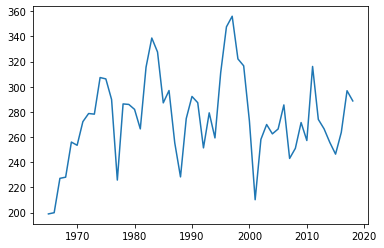

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [55]:
plt.plot(us["Year"], us["Hydropower (terawatt-hours)"])

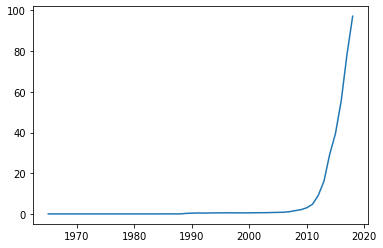

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [56]:
plt.plot(us["Year"], us["Solar (terawatt-hours)"])

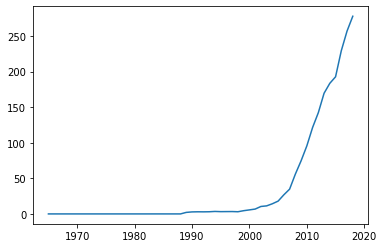

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [57]:
plt.plot(us["Year"], us["Wind (terawatt-hours)"])

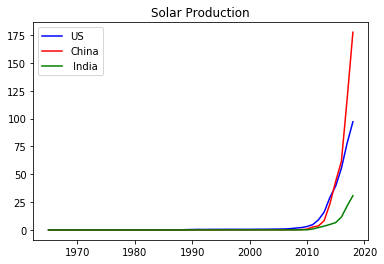

<IPython.core.display.Javascript object>

In [10]:
# Don't plan on using this to prove anything hypothesis wise, but do plan on using this in the introduction to show the growth
# of solar production throughout the years.
plt.plot(us["Year"], us["Solar (terawatt-hours)"], "-b", label="US")
plt.plot(china["Year"], china["Solar (terawatt-hours)"], "-r", label="China")
plt.plot(india["Year"], india["Solar (terawatt-hours)"], "-g", label=" India")
plt.title("Solar Production")
plt.legend(loc="upper left")

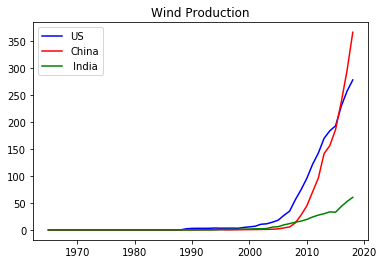

<IPython.core.display.Javascript object>

In [11]:
# Don't plan on using this to prove anything hypothesis wise, but do plan on using this in the introduction to show the growth
# of wind production throughout the years.
plt.plot(us["Year"], us["Wind (terawatt-hours)"], "-b", label="US")
plt.plot(china["Year"], china["Wind (terawatt-hours)"], "-r", label="China")
plt.plot(india["Year"], india["Wind (terawatt-hours)"], "-g", label=" India")
plt.title("Wind Production")
plt.legend(loc="upper left")